# Practicing Discretization and Binning with Music data

### Importing the libraries

In [2]:
import pandas as pd # to read the dataframe
import matplotlib.pyplot as plt # to plot the data

### Reading the dataset as a dataframe

In [3]:
# Reading dataframes
tracks_df = pd.read_csv('Spotify_Youtube.csv')

In [4]:
tracks_df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
tracks_df.head()

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [6]:
tracks_df.columns

Index(['Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

### Discovering the dataset 

In [7]:
#show the number of cells in the dataframe
print("tracks dataframe size: ", tracks_df.size)

#show the number of records (rows) in the dataframe
print("number of tracks: ", len(tracks_df))

tracks dataframe size:  559386
number of tracks:  20718


In [8]:
tracks_df.dtypes

Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [9]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

### Data Cleaning

##### 1. Replace Missing Values in Columns 'Views', 'Likes', and 'Comments' with Their Respective Medians

In [10]:
tracks_df.fillna({
    'Views': tracks_df['Views'].median(),
    'Likes': tracks_df['Likes'].median(),
    'Comments': tracks_df['Comments'].median()
}, inplace=True)

##### 2. Replace Missing Values in Specified Columns with Their Respective Means

In [11]:
tracks_df.fillna({
    'Duration_ms': tracks_df['Duration_ms'].mean(),
    'Tempo': tracks_df['Tempo'].mean(),
    'Loudness': tracks_df['Loudness'].mean(),
    'Speechiness': tracks_df['Speechiness'].mean(),
    'Energy': tracks_df['Energy'].mean()
}, inplace=True)

### Activities

##### 3. Classify track durations into `Short`, `Medium` and `long`.

In [12]:
bins = [0, 180000, 300000, float('inf')]
labels = ['Short', 'Medium', 'Long']
tracks_df['Duration_Category'] = pd.cut(tracks_df['Duration_ms'], bins=bins, labels=labels)

##### 4. Categorize Track Tempo into Appropriate Bins

In [13]:
bins = [0, 100, 140, float('inf')]
labels = ['Slow', 'Medium', 'Fast']
tracks_df['Tempo_Category'] = pd.cut(tracks_df['Tempo'], bins=bins, labels=labels)

##### 5. Categorize Tracks as 'Viral' or 'Non-Viral' Based on Views

In [14]:
bins = [float('-inf'), 1000000, float('inf')]
labels=['Non-Viral', 'Viral']
tracks_df['Viral_Category'] = pd.cut(tracks_df['Views'], bins=bins, labels=labels)

##### 6. Create a Grouped Bar Chart to Visualize the Relationship Between `Viral_Category` and `Tempo_Category`

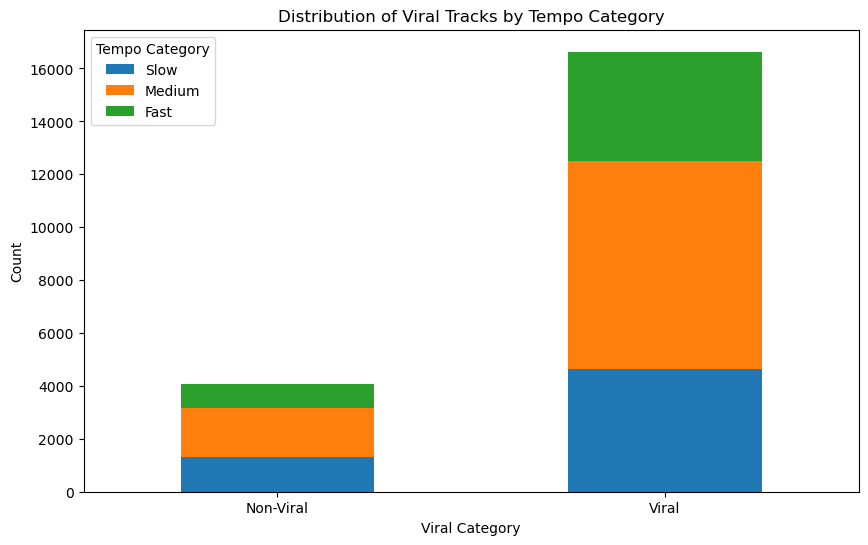

In [15]:
viral_tempo_counts = tracks_df.groupby(['Viral_Category', 'Tempo_Category']).size().unstack()
viral_tempo_bar_chart = viral_tempo_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Viral Category')
plt.ylabel('Count')
plt.title('Distribution of Viral Tracks by Tempo Category')
plt.legend(title='Tempo Category')
plt.xticks(rotation=0)
plt.show()

##### 7. Create a Grouped Bar Chart Visualizing `Viral_Category` & `Duration_Category` Relation

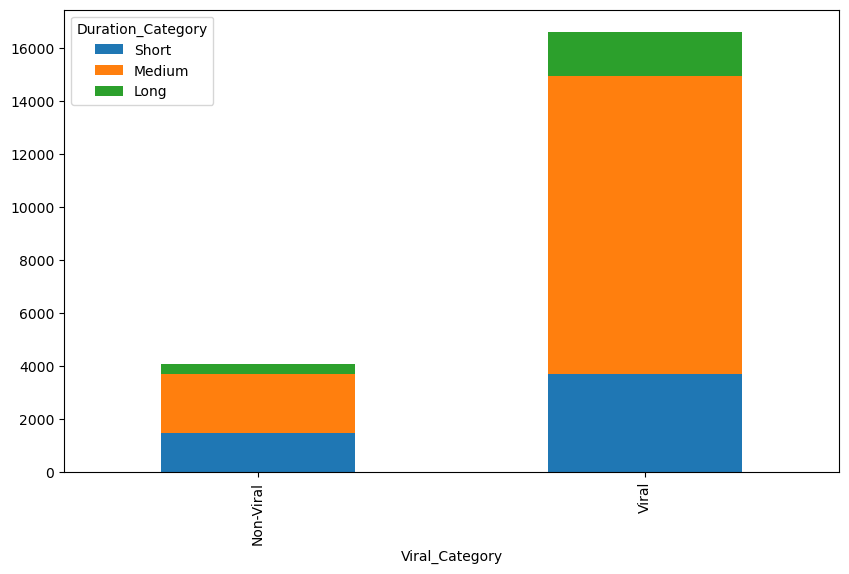

In [16]:
duration_viral_counts = tracks_df.groupby(['Viral_Category', 'Duration_Category']).size().unstack()
duration_viral_bar_chart = duration_viral_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

##### 8. Generate Dummy Variables for the `Album_type` Column with `Track` Prefix

In [17]:
album_type_dummies = pd.get_dummies(tracks_df['Album_type'], prefix='Track', dtype=bool)

In [19]:
album_type_dummies.sample(10)

,Track_album,Track_compilation,Track_single
20013,False,False,True
9419,False,False,True
10436,False,False,True
9815,True,False,False
11869,True,False,False
15696,True,False,False
12636,True,False,False
11047,True,False,False
19298,False,False,True
1915,False,True,False


##### 9. Categorize 'Loudness' Column into Predefined Bins

- Very Low tracks: those that are `between -50 and -35 dB`.
- Low tracks: between `-35 and -20 dB`
- Moderate tracks: `between -20 and -5 dB`
- High tracks: `between -5 and 10 dB`
- Very High: `above 10 dB`

In [20]:
bins = [-50, -35, -20, -5, 10, float('inf')]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

tracks_df['Loudness_Category'] = pd.cut(tracks_df['Loudness'], bins=bins, labels=labels)
tracks_df[['Loudness_Category', 'Loudness']].sample(10)

,Loudness_Category,Loudness
5374,Moderate,-8.326
20041,Moderate,-5.808
17391,Moderate,-9.016
6380,Moderate,-7.603
10710,Moderate,-7.725
18842,Moderate,-5.334
1532,Moderate,-5.996
10398,High,-2.555
16625,Moderate,-8.330
16206,High,-2.498


##### 10. Calculate the Number of Tracks with a 'Loudness_Category' of 'High'.

In [27]:
count_High_Loudness = len(tracks_df.loc[tracks_df['Loudness_Category']=='High', 'Loudness_Category'])
print(f'The number of tracks with high loudness is {count_High_Loudness}') 

The number of tracks with high loudness is 5410


##### 11. Generate Dummy Variables for 'Artist' Column with 'Genre' Prefix and ':' as prefix separator

In [28]:
genres_dummies = pd.get_dummies(tracks_df['Artist'], prefix='Genre', prefix_sep=':', dtype=bool)
genres_dummies

,Genre:$NOT,Genre:$uicideboy$,Genre:(G)I-DLE,Genre:*NSYNC,Genre:070 Shake,Genre:112,Genre:11:11 Music Group,Genre:1nonly,Genre:2 Chainz,Genre:21 Savage,...,Genre:mor ve ötesi,Genre:sped up nightcore,Genre:surrenderdorothy,Genre:t.A.T.u.,Genre:thasup,Genre:will.i.am,Genre:Ángela Aguilar,Genre:Ñejo,Genre:Ñengo Flow,Genre:Øneheart
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### 12. Categorize Tracks into Five Quantiles Based on Speechiness

In [31]:
tracks_df['Speechiness_Quantile'] = pd.qcut(tracks_df['Speechiness'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
tracks_df[['Speechiness' ,'Speechiness_Quantile']] 

,Speechiness,Speechiness_Quantile
0,0.1770,Q5
1,0.0302,Q1
2,0.0522,Q3
3,0.0260,Q1
4,0.1710,Q5
...,...,...
20713,0.0328,Q1
20714,0.1370,Q5
20715,0.0647,Q4
20716,0.4190,Q5


##### 13. Categorize the 'Energy' Column into Given Bins and Ranges

- Very Low tracks: those that are `between 0 and 0.2`.
- Low tracks: between `0.2 and 0.4`
- Moderate tracks: `between 0.4 and 0.6`
- High tracks: `between 0.6 and 0.8`
- Very High: `above 0.8`

In [35]:
tracks_df['Energy_Category'] = pd.cut(tracks_df['Energy'], bins=[0, 0.2, 0.4, 0.6, 0.8, float('inf')], labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
tracks_df[['Energy', 'Energy_Category']].sample(10)

,Energy,Energy_Category
12426,0.411,Moderate
18548,0.403,Moderate
8538,0.815,Very High
1677,0.373,Low
5862,0.499,Moderate
2854,0.870,Very High
14478,0.889,Very High
789,0.507,Moderate
15141,0.837,Very High
18986,0.702,High


In [36]:
tracks_df.sample(10)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Description,Licensed,official_video,Stream,Duration_Category,Tempo_Category,Viral_Category,Loudness_Category,Speechiness_Quantile,Energy_Category
13678,Florence + The Machine,https://open.spotify.com/artist/1moxjboGR7GNWY...,Choreomania,Dance Fever,album,spotify:track:7xdHw4C522RbsxHL9KD9L6,0.640,0.674,0.0,-7.605,...,Taken from new album ‘Dance Fever’. Out now – ...,True,True,14807593.0,Medium,Fast,Non-Viral,Moderate,Q3,High
10591,Gunna,https://open.spotify.com/artist/2hlmm7s2ICUX0L...,Drip or Drown,Drip or Drown,album,spotify:track:6ZthdsKjWtiCxnxbhs74vF,0.952,0.478,5.0,-8.520,...,"Watch the official music video of ""Drip or Dro...",True,True,172270149.0,Short,Medium,Viral,Moderate,Q5,Moderate
18159,Orochi,https://open.spotify.com/artist/3rfM2cGqF6DB0k...,Balão 2,Vida Cara,album,spotify:track:4y956Vqc68NtoH6Xpy91X2,0.612,0.724,1.0,-5.423,...,Ouça #VIDACARA em todas as plataformas digitai...,True,True,3251577.0,Medium,Medium,Viral,Moderate,Q3,High
6289,Donna Summer,https://open.spotify.com/artist/2eogQKWWoohI3B...,Hot Stuff - Single Version,Walk Away - Collector's Edition The Best Of 19...,compilation,spotify:track:2KNCPZQDalFIK3zZXlp6fd,0.817,0.697,0.0,-12.445,...,If you want to support the channel please visi...,False,False,24760740.0,Medium,Medium,Viral,Moderate,Q1,High
16125,5 Seconds of Summer,https://open.spotify.com/artist/5Rl15oVamLq7Fb...,Lie To Me (feat. Julia Michaels),Lie To Me (feat. Julia Michaels),single,spotify:track:6GzApXoBQiiAjak3tOQfV3,0.611,0.520,0.0,-5.445,...,Listen to Lie To Me (featuring Julia Michaels)...,True,True,247056386.0,Short,Fast,Viral,Moderate,Q2,Moderate
15107,Bethel Music,https://open.spotify.com/artist/26T4yOaOoFJvUv...,God of Revival - Live,Revival's In The Air (Live),album,spotify:track:6r0WuK50Lpu9u460x84oBn,0.360,0.608,1.0,-7.811,...,God of Revival sung by Brian and Jenn Johnson ...,True,True,27899588.0,Long,Fast,Viral,Moderate,Q1,High
682,Nate Dogg,https://open.spotify.com/artist/1Oa0bMld0A3u5O...,Shake That (Remix),Eminem Presents The Re-Up,compilation,spotify:track:404RYQiYJ2uq2ElfZ5CToK,0.945,0.701,8.0,-3.749,...,REMASTERED IN HD!\nPlaylist Best of Eminem: ht...,True,True,32805017.0,Short,Medium,Viral,High,Q5,High
10699,Alfonso Herrera,https://open.spotify.com/artist/0veZkZPeWoJQ9g...,Grita,Clase 406 El Siguiente Paso... !,compilation,spotify:track:5SrB0ATVAh78VdEPvXurss,0.648,0.979,10.0,-6.016,...,"""Movie bYtes"" is the one of YouTube channels, ...",False,False,NaN,Medium,Medium,Non-Viral,Moderate,Q3,Very High
17137,Masego,https://open.spotify.com/artist/3ycxRkcZ67ALN3...,Navajo,Navajo,single,spotify:track:6zWU7YALeEDMcPGhKKZJhV,0.567,0.593,6.0,-7.404,...,New COLORS Merch out now! https://shop.colorsx...,True,True,129227975.0,Medium,Slow,Viral,Moderate,Q5,Moderate
14252,La Santa Grifa,https://open.spotify.com/artist/1oH2B8tcHn4Gpl...,No Que No Eras Fan,Canciones Mamalonas 2,album,spotify:track:72KBDC6feOjHbiQ3x1jJ2N,0.829,0.682,1.0,-5.970,...,"Mc Davo, Santa Grifa - No Que No Eras Fan (Vid...",True,True,31870122.0,Medium,Fast,Viral,Moderate,Q5,High
